<a href="https://colab.research.google.com/github/campjake/2D-Graphics-Modeler/blob/main/01_mounting_gdrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TODO
- Fix 'RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when 
checking argument for argument mat1 in method wrapper_CUDA_addmm)'
- Train!
- See if we can run this notebook locally using our GPU(s)
  - Is Google Colab moving our Tensors from GPU -> CPU behind the scenes due to traffic demand?
- When we successfully train, we need to see if we can get those results on HuggingFace, and save them to our repository/locally as well using Colab's Save Copy to GitHub


# Download and Unzip Data

In [1]:
!gdown 1kvMIz2HryYLU_eek7w7lj_-xYSKd8rEL

Downloading...
From: https://drive.google.com/uc?id=1kvMIz2HryYLU_eek7w7lj_-xYSKd8rEL
To: /content/bps_hi_4hr.tar
100% 228M/228M [00:01<00:00, 180MB/s]


In [2]:
# Unzip file
!tar -xvf bps_hi_4hr.tar

Streaming output truncated to the last 5000 lines.
processed/P242_73665006707-G4_001_042_proj.tif
processed/P242_73665006707-G4_001_043_proj.tif
processed/P242_73665006707-G4_001_044_proj.tif
processed/P242_73665006707-G4_001_045_proj.tif
processed/P242_73665006707-G4_001_046_proj.tif
processed/P242_73665006707-G4_001_047_proj.tif
processed/P242_73665006707-G4_001_048_proj.tif
processed/P242_73665006707-G4_001_049_proj.tif
processed/P242_73665006707-G4_001_050_proj.tif
processed/P242_73665006707-G4_001_051_proj.tif
processed/P242_73665006707-G4_001_052_proj.tif
processed/P242_73665006707-G4_001_053_proj.tif
processed/P242_73665006707-G4_001_054_proj.tif
processed/P242_73665006707-G4_001_055_proj.tif
processed/P242_73665006707-G4_001_056_proj.tif
processed/P242_73665006707-G4_001_057_proj.tif
processed/P242_73665006707-G4_001_058_proj.tif
processed/P242_73665006707-G4_002_001_proj.tif
processed/P242_73665006707-G4_002_002_proj.tif
processed/P242_73665006707-G4_002_003_proj.tif
processed

# Clone repository

In [3]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
/root/.ssh/id_rsa already exists.
Overwrite (y/n)? 


In [4]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-51390fc7


In [5]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCyN9FTbNK9dEyOs+TQ0EnP17H5m46C2mBTYhG8wKdskSNycmzBkj/ruCQE8gYvfy7AQeoOtL0jqibUzvPogaXDDlrKpgGUVJqbFQXl9O0RESA1EeaIkfmcsOR8aGrh6xBCYXClHMQPADgZhi53vWgSrsfqwAe73A0ng7Md8JplWBIs/RIZbH8tJO8H9ayU9j1HpMeiaAyOvdc0a7OyZHiKbIpI0cz4DoIxq71RU8Nf54J0d439YBjtl2IIF5reFeTfThkpPd8400XVeEEz7tYKY8qZ2PaK2RPZpy2GDNTOj4YuHbyL/kYfzQM/2Pfx0Z5rI5d7cOpMLdJ/wQwxW6qH6h3QUpPohmCkVXZ/fPQ7pB3AR/d2muDzwxwTogCK9CsBQuu2j3erOWNyju/B+0uAYy/zmxTRFqiyosMeqHI7UAtxQPzwa2iU43JlTNGK1YdgdeFHK3ulsa9/GFe6BureLDw/u5bZA+ZrVJihvIfBJKfKHD7MTgbKgXIJpEekewoK9YibL6KH21Wty5FVbfuQffMc3cblyV/Q5tAUfPbmueepK1YfayHugJnnQ0lS2r+QGBSbVgbj/Z3PSNbxDfWv/M4zabHdmLysKQwk+obQ1E+FXUB5LbKRfwQlSTY2ShZslj45K2X2IKrhjq+i9uXV/V/jQgpSZ1T+UzTOejAvVQ== root@61be092a7680


In [6]:
!ssh -T git@github.com

Hi campjake! You've successfully authenticated, but GitHub does not provide shell access.


In [7]:
!git config --global user.email "campbell.jakelog@gmail.com"
!git config --global user.name "campjake"

In [8]:
!git clone git@github.com:UC-Irvine-CS175/deep-learning-eda.git

fatal: destination path 'deep-learning-eda' already exists and is not an empty directory.


# Checkout to working branch

In [9]:
%cd deep-learning-eda

/content/deep-learning-eda


In [10]:
!git checkout unsupervised-solution

D	models/ddpm-bps-hi-4hr/.gitkeep
Already on 'unsupervised-solution'
Your branch is up to date with 'origin/unsupervised-solution'.


In [11]:
# Confirm that branch is up to date
!git log --oneline -5

d652bbe (HEAD -> unsupervised-solution, origin/unsupervised-solution) Bugfix to stage unseen changes of ToThreeChannels function
5eb4bbf Bugfix for import error in bps_datamodule.py
2925c2b Imported ToThreeChannels function in bps_datamodule.py
9308b3c Added ToThreeChannels function for np arrays
e364c70 folder for diffusion model output


In [12]:
# Pull if not up to date
!git pull

Already up to date.


In [13]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Installing the dependencies

This notebook leverages the [🤗 Datasets](https://huggingface.co/docs/datasets/index) library to load and preprocess image datasets and the [🤗 Accelerate](https://huggingface.co/docs/accelerate/index) library to simplify training on any number of GPUs, with features like automatic gradient accumulation and tensorboard logging. Let's install them here:

In [14]:
%%capture
!pip install diffusers[training]==0.11.1

To be able to share your model with the community, there are a few more steps to follow.|

First you have to store your authentication token from the Hugging Face website (sign up [here](https://huggingface.co/join) if you haven't already!) then execute the following cell and input your **write** token:

In [15]:
from huggingface_hub import notebook_login

notebook_login()

Then you need to install Git-LFS to upload your model checkpoints:

In [16]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

## Config

For convenience, we define a configuration grouping all the training hyperparameters. This would be similar to the arguments used for a [training script](https://github.com/huggingface/diffusers/tree/main/examples).
Here we choose reasonable defaults for hyperparameters like `num_epochs`, `learning_rate`, `lr_warmup_steps`, but feel free to adjust them if you train on your own dataset. For example, `num_epochs` can be increased to 100 for better visual quality.

In [17]:
from dataclasses import dataclass

@dataclass
class TrainingConfig:
    image_size = 128  # the generated image resolution
    train_batch_size = 16
    eval_batch_size = 16  # how many images to sample during evaluation
    num_workers = 1
    num_epochs = 50
    gradient_accumulation_steps = 1
    learning_rate = 1e-4
    lr_warmup_steps = 500
    save_image_epochs = 10
    save_model_epochs = 30
    mixed_precision = 'fp16'  # `no` for float32, `fp16` for automatic mixed precision
    output_dir = 'models/ddpm-bps-hi-4hr'  # the model name locally and on the HF Hub

    push_to_hub = False  # whether to upload the saved model to the HF Hub
    hub_private_repo = False  
    overwrite_output_dir = True  # overwrite the old model when re-running the notebook
    seed = 0
    dm_stage: str = 'train'

train_config = TrainingConfig()

In [18]:
import pyprojroot
root = pyprojroot.find_root(pyprojroot.has_dir(".git"))
import sys
sys.path.append(str(root))
import torch
import numpy as np
import random

In [19]:
@dataclass
class BPSFileConfig:
    """ Configuration options for BPS Microscopy dataset.

    Args:
        data_dir: Path to the directory containing the image dataset. Defaults
            to the `data/processed` directory from the project root.

        train_meta_fname: Name of the training CSV file.
            Defaults to 'meta_dose_hi_hr_4_post_exposure_train.csv'

        val_meta_fname: Name of the validation CSV file.
            Defaults to 'meta_dose_hi_hr_4_post_exposure_test.csv'
        
        save_dir: Path to the directory where the model will be saved. Defaults
            to the `models/SAP_model` directory from the project root.
    """
    data_dir:           str = '../processed'
    train_meta_fname:   str = 'meta_dose_hi_hr_4_post_exposure_train.csv'
    val_meta_fname:     str = 'meta_dose_hi_hr_4_post_exposure_test.csv'
    save_vis_dir:       str = root / 'models' / 'dummy_vis'
    save_models_dir:    str = root / 'models' / 'ddpm-bps-hi-4hr'

file_config = BPSFileConfig()

# Import relevant modules for the datamodule

In [21]:
!ls -l ../processed/

Streaming output truncated to the last 5000 lines.
-rw-r--r-- 1 15383 1157  21819 May 31 00:04 P242_73665006707-G4_001_039_proj.tif
-rw-r--r-- 1 15383 1157  14085 May 31 00:08 P242_73665006707-G4_001_040_proj.tif
-rw-r--r-- 1 15383 1157   8737 May 31 00:09 P242_73665006707-G4_001_041_proj.tif
-rw-r--r-- 1 15383 1157  14283 May 31 00:06 P242_73665006707-G4_001_042_proj.tif
-rw-r--r-- 1 15383 1157  18049 May 31 00:02 P242_73665006707-G4_001_043_proj.tif
-rw-r--r-- 1 15383 1157  10319 May 31 00:09 P242_73665006707-G4_001_044_proj.tif
-rw-r--r-- 1 15383 1157  10521 May 30 23:57 P242_73665006707-G4_001_045_proj.tif
-rw-r--r-- 1 15383 1157  26547 May 31 00:02 P242_73665006707-G4_001_046_proj.tif
-rw-r--r-- 1 15383 1157  20199 May 31 00:07 P242_73665006707-G4_001_047_proj.tif
-rw-r--r-- 1 15383 1157  22445 May 31 00:08 P242_73665006707-G4_001_048_proj.tif
-rw-r--r-- 1 15383 1157  19947 May 31 00:08 P242_73665006707-G4_001_049_proj.tif
-rw-r--r-- 1 15383 1157  26111 May 31 00:13 P242_736650067

In [20]:
from src.dataset.bps_datamodule import BPSDataModule
from src.dataset.augmentation import(
    NormalizeBPS,
    ResizeBPS,
    ToThreeChannels,
    ToTensor
)

In [21]:
# Tip 1: fix random seed
torch.manual_seed(train_config.seed)
random.seed(train_config.seed)
np.random.seed(train_config.seed)

# Instantiate BPSDataModule
bps_datamodule = BPSDataModule(train_csv_file=file_config.train_meta_fname,
                               train_dir=file_config.data_dir,
                               val_csv_file=file_config.val_meta_fname,
                               val_dir=file_config.data_dir,
                               resize_dims=(128, 128),
                               batch_size=train_config.train_batch_size,
                               num_workers=train_config.num_workers)

In [22]:
# Using BPSDataModule's setup, define the stage name ('train' or 'val')
bps_datamodule.setup(stage=train_config.dm_stage)

# Confirm that the datamodule was successfully by visualizing a small subset

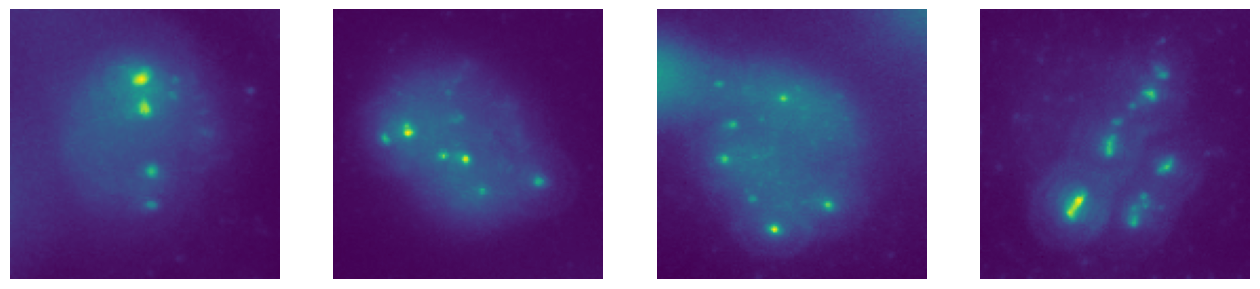

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, (image, label) in enumerate(bps_datamodule.train_dataloader()):
    axs[i].imshow(image[i, 0, :, :])
    axs[i].set_axis_off()
    if i == 3:
      break
fig.show()

## Defining the diffusion model

Here we set up our diffusion model. Diffusion models are neural networks that are trained to predict slightly less noisy images from a noisy input. At inference, they can be used to iteratively transform a random noise to generate an image:

<p align="center">
    <img src="https://user-images.githubusercontent.com/10695622/174349667-04e9e485-793b-429a-affe-096e8199ad5b.png" width="800"/>
    <br>
    <em> Figure from DDPM paper (https://arxiv.org/abs/2006.11239). </em>
<p>

Don't worry too much about the math if you're not familiar with it, the import part to remember is that our model corresponds to the arrow $p_{\theta}(x_{t-1}|x_{t})$ (which is a fancy way of saying: predict a slightly less noisy image).

The interesting part is that it's really easy to add some noise to an image, so the training can happen in a semi-supervised fashion as follows:
1. Take an image from the training set.
2. Apply to it some random noise $t$ times (this will give the $x_{t-1}$ and the $x_{t}$ in the figure above).
3. Give this noisy image to the model along with the value of $t$.
4. Compute a loss from the output of the model and the noised image $x_{t-1}$.

Then we can apply gradient descent and repeat this process multiple times.

Most diffusion models use architectures that are some variant of a [U-net](https://arxiv.org/abs/1505.04597) and that's what we'll use here.

![](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/unet-model.png)

In a nutshell:
- the model has the input image go through several blocks of ResNet layers which halves the image size by 2
- then through the same number of blocks that upsample it again.
- there are skip connections linking the features on the downample path to the corresponsding layers in the upsample path.

A key feature of this model is that it predicts images of the same size as the input, which is exactly what we need here.

Diffusers provides us a handy `UNet2DModel` class which creates the desired architecture in PyTorch.

Let's create a U-net for our desired image size. 
Note that `down_block_types` correspond to the downsampling blocks (green on the diagram above), and `up_block_types` are the upsampling blocks (red on the diagram):


In [24]:
from diffusers import UNet2DModel


model = UNet2DModel(
    sample_size=train_config.image_size,  # the target image resolution
    in_channels=3,  # the number of input channels, 3 for RGB images
    out_channels=3,  # the number of output channels
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(128, 128, 256, 256, 512, 512),  # the number of output channes for each UNet block
    down_block_types=( 
        "DownBlock2D",  # a regular ResNet downsampling block
        "DownBlock2D", 
        "DownBlock2D", 
        "DownBlock2D", 
        "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
        "DownBlock2D",
    ), 
    up_block_types=(
        "UpBlock2D",  # a regular ResNet upsampling block
        "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
        "UpBlock2D", 
        "UpBlock2D", 
        "UpBlock2D", 
        "UpBlock2D"  
      ),
)

In [39]:
model = model.to('cuda')

Let's get a sample batch from our dataset and pass it into our model:

In [25]:
print('Input shape:', image.shape)

Input shape: torch.Size([16, 3, 128, 128])


And let's check the output is a tensor of the same exact shape:

In [41]:
print('Output shape:', model(image, timestep=0).sample.shape)

Output shape: torch.Size([16, 3, 128, 128])


Great!

Note that our model takes in the (noisy) image and also the current time-step (as we saw before in the training overview). That time-step information is converted for the model using a sinusoidal positional embedding, similar to what Transformer models often do.

Now that we have our model, we just need an object to *add noise to an image*. This is done by the **schedulers** in the `diffusers` library.

## Defining the noise scheduler

Depending on the diffusion algorithm you want to use, the way images are noised is slightly different. That's why 🤗 Diffusers contains different scheduler classes which each define the algorithm-specific diffusion steps. Here we are going to use the `DDPMScheduler` which corresponds to the training denoising and training algorithm proposed in [Denoising Diffusion Probabilistic Models](https://arxiv.org/abs/2006.11239).

In [40]:
from diffusers import DDPMScheduler

noise_scheduler = DDPMScheduler(num_train_timesteps=1000)

Let's see how this noise scheduler works: it takes a batch of images from the trainng set (here we will reuse the batch of one image `sample_image` form before), a batch of random noise of the same shape and the timesteps for each image (which correspond to the number of times we want to apply noise to each image):

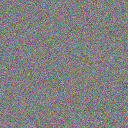

In [41]:
import torch
from PIL import Image

noise = torch.randn(image.shape)
timesteps = torch.LongTensor([50])
noisy_image = noise_scheduler.add_noise(image, noise, timesteps)

Image.fromarray(((noisy_image.permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0])

In [47]:
noisy_image = noisy_image.to('cuda')
timesteps = timesteps.to('cuda')
noise = noise.to('cuda')

In the DDPM algorithm, the training objective of the model is then to be able to predict the noise we used in `noise_scheduler.add_noise`, so the loss at this step would be:

In [49]:
import torch.nn.functional as F

noise_pred = model(noisy_image, timesteps).sample
noise_pred = noise_pred.to('cuda')

loss = F.mse_loss(noise_pred, noise)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 3>:3                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501 in _call_impl            │
│                                                                                                  │
│   1498 │   │   if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks   │
│   1499 │   │   │   │   or _global_backward_pre_hooks or _global_backward_hooks                   │
│   1500 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1501 │   │   │   return forward_call(*args, **kwargs)                                          │
│   1502 │   │   # Do not call functions when jit is used                                          │
│   1503 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1504 │   │   backward_pre_hooks = []                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/accelerate/utils/operations.py:521 in forward            │
│                                                                                                  │
│   518 │   model_forward = ConvertOutputsToFp32(model_forward)                                    │
│   519 │                                                                                          │
│   520 │   def forward(*args, **kwargs):                                                          │
│ ❱ 521 │   │   return model_forward(*args, **kwargs)                                              │
│   522 │                                                                                          │
│   523 │   # To act like a decorator so that it can be popped when doing `extract_model_from_pa   │
│   524 │   forward.__wrapped__ = model_forward                                                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/accelerate/utils/operations.py:509 in __call__           │
│                                                                                                  │
│   506 │   │   update_wrapper(self, model_forward)                                                │
│   507 │                                                                                          │
│   508 │   def __call__(self, *args, **kwargs):                                                   │
│ ❱ 509 │   │   return convert_to_fp32(self.model_forward(*args, **kwargs))                        │
│   510 │                                                                                          │
│   511 │   def __getstate__(self):                                                                │
│   512 │   │   raise pickle.PicklingError(                                                        │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:14 in decorate_autocast       │
│                                                                                                  │
│    11 │   @functools.wraps(func)                                                                 │
│    12 │   def decorate_autocast(*args, **kwargs):                                                │
│    13 │   │   with autocast_instance:                                                            │
│ ❱  14 │   │   │   return func(*args, **kwargs)                                                   │
│    15 │   decorate_autocast.__script_unsupported = '@autoca

## Setting up training

We have all we need to be able to train our model! Let's use a standard AdamW optimizer:

In [29]:
optimizer = torch.optim.AdamW(model.parameters(), lr=train_config.learning_rate)

 And a cosine learning rate schedule:

In [30]:
from diffusers.optimization import get_cosine_schedule_with_warmup

lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=train_config.lr_warmup_steps,
    num_training_steps=(len(bps_datamodule.train_dataloader()) * train_config.num_epochs),
)

To evaluate our model, we use the `DDPMPipeline` which is an easy way to perform end-to-end inference (see this notebook [TODO link] for more detail). We will use this pipeline to generate a batch of sample images and save it as a grid to the disk. 

In [31]:
from diffusers import DDPMPipeline

import math

def make_grid(images, rows, cols):
    w, h = images[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, image in enumerate(images):
        grid.paste(image, box=(i%cols*w, i//cols*h))
    return grid

def evaluate(config, epoch, pipeline):
    # Sample some images from random noise (this is the backward diffusion process).
    # The default pipeline output type is `List[PIL.Image]`
    images = pipeline(
        batch_size = config.eval_batch_size, 
        generator=torch.manual_seed(config.seed),
    ).images

    # Make a grid out of the images
    image_grid = make_grid(images, rows=4, cols=4)

    # Save the images
    test_dir = os.path.join(config.output_dir, "samples")
    os.makedirs(test_dir, exist_ok=True)
    image_grid.save(f"{test_dir}/{epoch:04d}.png")

With this in end, we can group all together and write our training function. This just wraps the training step we saw in the previous section in a loop, using Accelerate for easy TensorBoard logging, gradient accumulation, mixed precision training and multi-GPUs or TPU training.

In [37]:
from accelerate import Accelerator
from huggingface_hub import HfFolder, Repository, whoami

from tqdm.auto import tqdm
from pathlib import Path
import os

def get_full_repo_name(model_id: str, organization: str = None, token: str = None):
    if token is None:
        token = HfFolder.get_token()
    if organization is None:
        username = whoami(token)["name"]
        return f"{username}/{model_id}"
    else:
        return f"{organization}/{model_id}"

def train_loop(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler):
    # Initialize accelerator and tensorboard logging
    accelerator = Accelerator(
        mixed_precision=train_config.mixed_precision,
        gradient_accumulation_steps=train_config.gradient_accumulation_steps, 
        log_with="tensorboard",
        logging_dir=os.path.join(train_config.output_dir, "logs")
    )
    if accelerator.is_main_process:
        if train_config.push_to_hub:
            repo_name = get_full_repo_name(Path(train_config.output_dir).name)
            repo = Repository(train_config.output_dir, clone_from=repo_name)
        elif train_config.output_dir is not None:
            os.makedirs(train_config.output_dir, exist_ok=True)
        accelerator.init_trackers("train_example")
    
    # Prepare everything
    # There is no specific order to remember, you just need to unpack the 
    # objects in the same order you gave them to the prepare method.
    model, optimizer, train_dataloader, lr_scheduler = accelerator.prepare(
        model, optimizer, bps_datamodule.train_dataloader(), lr_scheduler
    )
    
    global_step = 0

    # Now you train the model
    for epoch in range(train_config.num_epochs):
        progress_bar = tqdm(total=len(train_dataloader),
                            disable=not accelerator.is_local_main_process)
        progress_bar.set_description(f"Epoch {epoch}")

        for step, batch in enumerate(bps_datamodule.train_dataloader()):
            clean_images, labels = batch
            # clean_images = batch['images']
            # Sample noise to add to the images
            noise = torch.randn(clean_images.shape).to(clean_images.device)
            bs = clean_images.shape[0]

            # Sample a random timestep for each image
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), 
                                      device=clean_images.device).long()

            # Add noise to the clean images according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)
            
            with accelerator.accumulate(model):
                # Predict the noise residual
                noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
                loss = F.mse_loss(noise_pred, noise)
                accelerator.backward(loss)

                accelerator.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()
            
            progress_bar.update(1)
            logs = {"loss": loss.detach().item(), "lr": lr_scheduler.get_last_lr()[0], "step": global_step}
            progress_bar.set_postfix(**logs)
            accelerator.log(logs, step=global_step)
            global_step += 1

        # After each epoch you optionally sample some demo images with evaluate() and save the model
        if accelerator.is_main_process:
            pipeline = DDPMPipeline(unet=accelerator.unwrap_model(model), scheduler=noise_scheduler)

            if (epoch + 1) % train_config.save_image_epochs == 0 or epoch == train_config.num_epochs - 1:
                evaluate(train_config, epoch, pipeline)

            if (epoch + 1) % train_config.save_model_epochs == 0 or epoch == train_config.num_epochs - 1:
                if train_config.push_to_hub:
                    repo.push_to_hub(commit_message=f"Epoch {epoch}", blocking=True)
                else:
                    pipeline.save_pretrained(config.output_dir) 

In [36]:
# !ls -la models/ddpm-bps-hi-4hr/
!pip show accelerate

Name: accelerate
Version: 0.19.0
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: sylvain@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, packaging, psutil, pyyaml, torch
Required-by: 


## Let's train!

Let's launch the training (including multi-GPU training) from the notebook using Accelerate's `notebook_launcher` function:

In [38]:
from accelerate import notebook_launcher
args = (train_config, model, 
        noise_scheduler, optimizer, 
        bps_datamodule.train_dataloader(), 
        lr_scheduler)

notebook_launcher(train_loop, args, num_processes=1)

Launching training on one GPU.


  0%|          | 0/444 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 7>:7                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/accelerate/launchers.py:103 in notebook_launcher         │
│                                                                                                  │
│   100 │   │   │   print("Launching training on one GPU.")                                        │
│   101 │   │   else:                                                                              │
│   102 │   │   │   print("Launching training on one CPU.")                                        │
│ ❱ 103 │   │   function(*args)                                                                    │
│   104 │   else:                                                                                  │
│   105 │   │   if num_processes is None:                                                          │
│   106 │   │   │   raise ValueError(                                                              │
│ in train_loop:65                                                                                 │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501 in _call_impl            │
│                                                                                                  │
│   1498 │   │   if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks   │
│   1499 │   │   │   │   or _global_backward_pre_hooks or _global_backward_hooks                   │
│   1500 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1501 │   │   │   return forward_call(*args, **kwargs)                                          │
│   1502 │   │   # Do not call functions when jit is used                                          │
│   1503 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1504 │   │   backward_pre_hooks = []                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/accelerate/utils/operations.py:521 in forward            │
│                                                                                                  │
│   518 │   model_forward = ConvertOutputsToFp32(model_forward)                                    │
│   519 │                                                                                          │
│   520 │   def forward(*args, **kwargs):                                                          │
│ ❱ 521 │   │   return model_forward(*args, **kwargs)                                              │
│   522 │                                                                                          │
│   523 │   # To act like a decorator so that it can be popped when doing `extract_model_from_pa   │
│   524 │   forward.__wrapped__ = model_forward                                                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/accelerate/utils/operations.py:509 in __call__           │
│                                                                                                  │
│   506 │   │   update_wrapper(self, model_forward)                                                │
│   507 │                                                                                          │
│   508 │   def __call__(self, *args, **kwargs):                                                   │
│ ❱ 509 │   │   return convert_to_fp32(self.model_forward(*ar

Let's have a look at the final image grid produced by the trained diffusion model: